# Objective:Analysing the impact of Directors in the success of movies

To determine if directors impact the success of movies

# importing the neccesary libraries

In [45]:

import numpy as np
import pandas as pd 
from numbers import Number
import sqlite3
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns



# loading and exploring the datasets

In [50]:
movie_info_df=pd.read_csv('../../Datasets/rt.movie_info.tsv', sep= '\t', header=0)
movie_info_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [51]:
movie_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


# Data cleaning

In [54]:
# Removing rows with any NaN values
movie_info_df= movie_info_df.dropna()
movie_info_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,"1,039,869",108 minutes,ATO Pictures
18,25,"From ancient Japan's most enduring tale, the e...",PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,Chris Morgan|Hossein Amini,"Dec 25, 2013","Apr 1, 2014",$,"20,518,224",127 minutes,Universal Pictures


In [55]:

# Extract the 'directors' column and 'box_office' column
df = movie_info_df[['director' , 'box_office']]
print(df)


                 director  box_office
1        David Cronenberg     600,000
6             Jake Kasdan  41,032,915
7            Ray Lawrence     224,114
15    George Hickenlooper   1,039,869
18       Carl Erik Rinsch  20,518,224
...                   ...         ...
1530        Cameron Crowe  72,700,000
1537          Ciro Guerra   1,320,005
1541          Joss Whedon  25,335,935
1542         Gauri Shinde   1,416,189
1545  Sebastian Gutierrez      59,371

[235 rows x 2 columns]


In [56]:
print(df.dtypes)


director      object
box_office    object
dtype: object


In [58]:
 #Remove commas and convert to numeric
df['box_office'] = df['box_office'].str.replace(',', '').astype(float)

C:\Users\jessm\AppData\Local\Temp\ipykernel_8848\3431724681.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['box_office'] = df['box_office'].str.replace(',', '').astype(float)


# Data aggregation

In [59]:
total_box_office = df.groupby('director')['box_office'].sum().nlargest(10)
print(total_box_office)


director
Jay Roach           443622410.0
Mel Gibson          368000000.0
Sam Mendes          322177808.0
Peter Jackson       303001229.0
Bryan Singer        297802264.0
Chris Columbus      261835892.0
Gore Verbinski      251767930.0
Joel Zwick          241250669.0
Steven Spielberg    234141872.0
David Fincher       230006595.0
Name: box_office, dtype: float64


In [71]:

# Group by director and calculate the average box office revenue
average_box_office = df.groupby('director')['box_office'].mean()

# Find the director with the largest average box office revenue
top_directors = average_box_office.nlargest(10)

In [ ]:
max_box_office = df.groupby('director')['box_office'].max()
print(max_box_office)


director
Adam Ravetch|Sarah Robertson         598103.0
Adam Shankman                      82468131.0
Alex Kendrick|Stephen Kendrick     10127352.0
Alex Proyas                       144738046.0
Alexander Payne                    11348612.0
                                     ...     
Uli Edel|Ulrich Edel               13432508.0
Will Canon                            16632.0
William Friedkin                    1800000.0
Woody Allen                        55400000.0
Yimou Zhang                        10928042.0
Name: box_office, Length: 217, dtype: float64


In [65]:
min_box_office = df.groupby('director')['box_office'].min().nlargest(10)
print(min_box_office)

director
Mel Gibson                     368000000.0
Peter Jackson                  303001229.0
Chris Columbus                 261835892.0
Joel Zwick                     241250669.0
Steven Spielberg               234141872.0
Peter Berg                     227946274.0
Justin Lin                     209805005.0
Robert Stromberg               190871149.0
Andrew Tennant|Andy Tennant    177575142.0
Paul Greengrass                176049130.0
Name: box_office, dtype: float64


# Data visualisation

# Top 10 Directors by Total Box Office Revenue

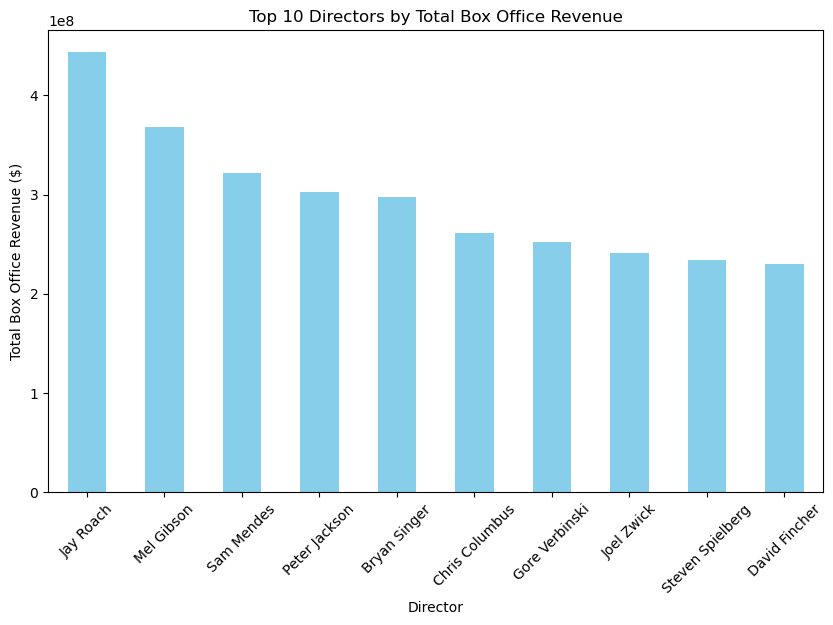

In [68]:
# Plotting
plt.figure(figsize=(10, 6))
total_box_office.plot(kind='bar', color='skyblue')
plt.xlabel('Director')
plt.ylabel('Total Box Office Revenue ($)')
plt.title('Top 10 Directors by Total Box Office Revenue')
plt.xticks(rotation=45)
plt.show()


# Directors with the Largest Average Box Office Revenue

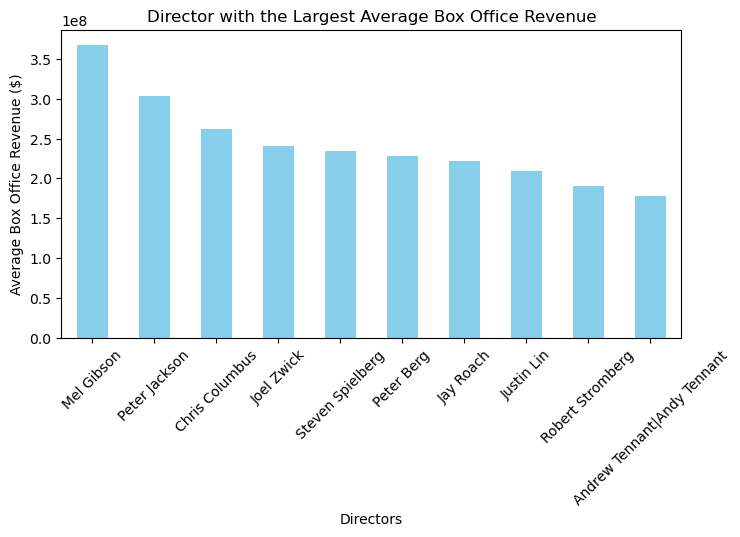

In [ ]:
# Plotting the top director's average box office revenue
plt.figure(figsize=(8, 4))
top_directors.plot(kind='bar', color='skyblue')
plt.xlabel('Directors')
plt.ylabel('Average Box Office Revenue ($)')
plt.title('Directors with the Largest Average Box Office Revenue')
plt.xticks(rotation=45)
plt.show()

# Directors with the lowest box office avarage

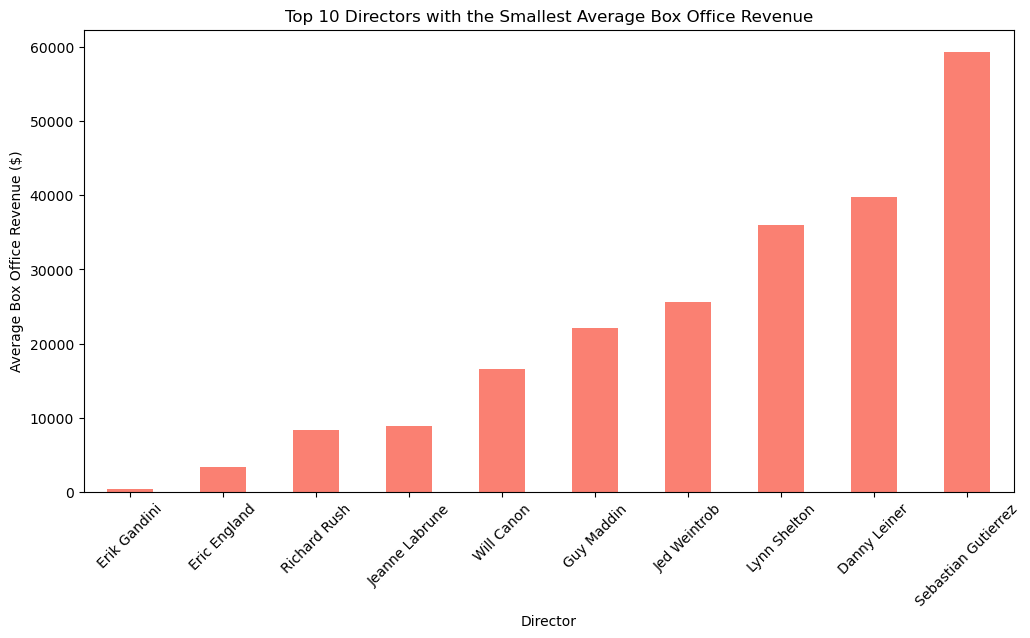

In [73]:
# Find the directors with the smallest average box office revenue
bottom_directors = average_box_office.nsmallest(10)

# Plotting the directors with the smallest average box office revenue
plt.figure(figsize=(12, 6))
bottom_directors.plot(kind='bar', color='salmon')
plt.xlabel('Director')
plt.ylabel('Average Box Office Revenue ($)')
plt.title('Top 10 Directors with the Smallest Average Box Office Revenue')
plt.xticks(rotation=45)
plt.show()

# Statistical analysis

Chi-Square test

In [74]:

# Categorize the 'box_office' into bins: low, medium, high
bins = [0, 10000000, 50000000, np.inf]
labels = ['Low', 'Medium', 'High']
df['box_office_category'] = pd.cut(df['box_office'], bins=bins, labels=labels)

# Create a contingency table between director and box_office_category
contingency_table = pd.crosstab(df['director'], df['box_office_category'])

# Perform the Chi-Square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies: \n{expected}")

# Interpret the result
if p < 0.05:
    print("There is a significant association between director and box office category.")
else:
    print("There is no significant association between director and box office category.")

Chi-Square Statistic: 447.3133536440496
P-value: 0.29544176210139567
Degrees of Freedom: 432
Expected Frequencies: 
[[0.39148936 0.34893617 0.25957447]
 [0.39148936 0.34893617 0.25957447]
 [0.39148936 0.34893617 0.25957447]
 [0.39148936 0.34893617 0.25957447]
 [0.39148936 0.34893617 0.25957447]
 [0.39148936 0.34893617 0.25957447]
 [0.39148936 0.34893617 0.25957447]
 [0.39148936 0.34893617 0.25957447]
 [0.39148936 0.34893617 0.25957447]
 [0.78297872 0.69787234 0.51914894]
 [0.39148936 0.34893617 0.25957447]
 [0.39148936 0.34893617 0.25957447]
 [0.39148936 0.34893617 0.25957447]
 [0.78297872 0.69787234 0.51914894]
 [0.39148936 0.34893617 0.25957447]
 [0.39148936 0.34893617 0.25957447]
 [0.39148936 0.34893617 0.25957447]
 [0.39148936 0.34893617 0.25957447]
 [0.39148936 0.34893617 0.25957447]
 [0.78297872 0.69787234 0.51914894]
 [0.39148936 0.34893617 0.25957447]
 [0.78297872 0.69787234 0.51914894]
 [0.78297872 0.69787234 0.51914894]
 [0.39148936 0.34893617 0.25957447]
 [0.39148936 0.34893

C:\Users\jessm\AppData\Local\Temp\ipykernel_8848\2138204380.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['box_office_category'] = pd.cut(df['box_office'], bins=bins, labels=labels)


The box office performance of a movie seems to be related to the director, meaning some directors consistently produce movies that fall into specific box office categories (e.g., "High" grossing, "Medium" grossing, or "Low" grossing).

# Recommendation
1.This are the top 3 directors recommended for hiring for the movie to make high box office revenue MEl GIBSON, PETER JACKSON, CHRIS COLUMBUS



2.This are bottom 3 directors that would post the lowest revenue ERIK GARDINI, ERIC ENGLAND,RICHARD RUSH